In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv(r"C:\Users\datta\OneDrive\Desktop\py\analytics\Blood_samples_dataset_balanced_2(f).csv")

In [5]:
train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


Here, we have imported excel file by giving the path, It has mostly duplicated data because this dataset is hand made.but it gives good results for practice.

In [6]:
test = pd.read_csv(r"C:\Users\datta\OneDrive\Desktop\py\analytics\blood_samples_dataset_test.csv")

we have imported file with data for testing, as we have got two seperated files for this dataset from kaggle. now we are going to concat them into one dataframe

In [7]:
test.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [8]:
train.shape

(2351, 25)

tuple shows the dimensions(rows, columns) of our dataframe

In [9]:
test.shape

(486, 25)

In [10]:
df=pd.concat([train,test],axis=0)

we have concatenated two seperate files into one dataframe

In [11]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


here, we can see various dataframe input columns, in this "disease" is our output column.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2837 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                       

In [13]:
df.duplicated().sum()

2286

2286 duplicates found out of 2837, this dataset is for practice and learning purpose. we will not eliminate those values.

In [14]:
df["Disease"].value_counts()

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

we can see the types of diseases and their count here 

In [15]:
df.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

no null value found

In [16]:
df["Disease"] = df["Disease"].map({"Healthy":3,"Anemia":2,"Diabetes":1,"Heart Di":6,"Thalasse":4, "Thromboc":5})

As seen previously, output column "disease" has categorical values, so we are converting strings into int by assigning numbers to diseases

In [17]:
X = df.drop("Disease", axis=1)

we have now segregated data into X (it will be our input) by dropping output column 

In [18]:
y = df["Disease"]

In [19]:
y

0      3
1      1
2      4
3      2
4      4
      ..
481    1
482    6
483    2
484    1
485    1
Name: Disease, Length: 2837, dtype: int64

disease will be our output column

In [261]:
from sklearn.preprocessing import StandardScaler

we are now transforming input data into standard format using standardscalar function 

In [262]:
scaler = StandardScaler()

In [263]:
X = scaler.fit_transform(X)

In [264]:
X

array([[ 1.35469484,  0.94496806,  0.51886542, ..., -1.42279668,
         0.00714342,  1.27535729],
       [-1.00305554, -1.55380842,  1.34818277, ...,  0.90089575,
         1.35844594, -0.17341009],
       [ 0.25919642, -1.1829544 , -0.08743154, ..., -0.09598008,
         1.28950759,  1.31463188],
       ...,
       [-1.21339923, -0.03376   ,  0.07925318, ...,  1.46339032,
         0.79233493, -1.26094611],
       [ 1.97235136,  0.07032089, -1.16577976, ...,  0.09404838,
         1.53529088,  0.8396062 ],
       [ 1.88254638,  0.73622898,  0.57914298, ..., -1.3849635 ,
        -1.57417557, -1.5582582 ]])

In [265]:
X.shape

(2837, 24)

tuple shows the dimensions(rows, columns) of our dataframe

In [266]:
y.shape

(2837,)

tuple shows output is one-dimensional

In [267]:
from sklearn.model_selection import train_test_split

here we are selecting our model (dividing data into training and testing data)

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)

In [269]:
lr = LinearRegression()
dtc = DecisionTreeClassifier(criterion = "entropy")
rfc = RandomForestClassifier(n_estimators=200, random_state=42)


here we are building our model for different algorithms to perform 

In [270]:
d = []
for i in [lr, dtc, rfc]:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    d.append({"Model":i, "Score":r2, "Mean_squared Error":mse})


we have used for loop here on different algorithms by using same testing and training data to get r2 score and mean squared error

In [271]:
d

[{'Model': LinearRegression(),
  'Score': 0.3149660767188127,
  'Mean_squared Error': 1.203614438422304},
 {'Model': DecisionTreeClassifier(criterion='entropy'),
  'Score': 0.6653253477520706,
  'Mean_squared Error': 0.5880281690140845},
 {'Model': RandomForestClassifier(n_estimators=200, random_state=42),
  'Score': 0.6382708099955015,
  'Mean_squared Error': 0.6355633802816901}]

In [272]:
model_details = pd.DataFrame(d)

In [273]:
model_details

,Model,Score,Mean_squared Error
0,LinearRegression(),0.314966,1.203614
1,DecisionTreeClassifier(criterion='entropy'),0.665325,0.588028
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.638271,0.635563


here, we have evaluated our model for better score. decision tree classifier has high score. it has less error too.

In [274]:
from sklearn.linear_model import LogisticRegression

NOW, WE HAVE SELECTED LOGISTIC REGRESSION MODEL as we have seen input columns have corelation with each other.

In [275]:
lg = LogisticRegression()

we are building logistic regression model 

In [276]:
lg.fit(X_train, y_train)

LogisticRegression()

we have used training data to fit into model

In [277]:
y_pred = lg.predict(X_test)

In [278]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [279]:
accuracy_score(y_test, y_pred)

0.8873239436619719

this is accuracy score for logistic regression model.(model evaluation)

In [281]:
confusion_matrix(y_test, y_pred)

array([[147,   7,   7,   3,   2,   1],
       [  9, 134,   0,   0,   2,   2],
       [  0,   0, 114,   0,   0,   0],
       [ 12,   1,   1,  84,   1,   0],
       [  1,   0,   1,   1,  25,   0],
       [  3,   3,   6,   1,   0,   0]], dtype=int64)

In [282]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.88      0.87       167
           2       0.92      0.91      0.92       147
           3       0.88      1.00      0.94       114
           4       0.94      0.85      0.89        99
           5       0.83      0.89      0.86        28
           6       0.00      0.00      0.00        13

    accuracy                           0.89       568
   macro avg       0.74      0.76      0.75       568
weighted avg       0.87      0.89      0.88       568



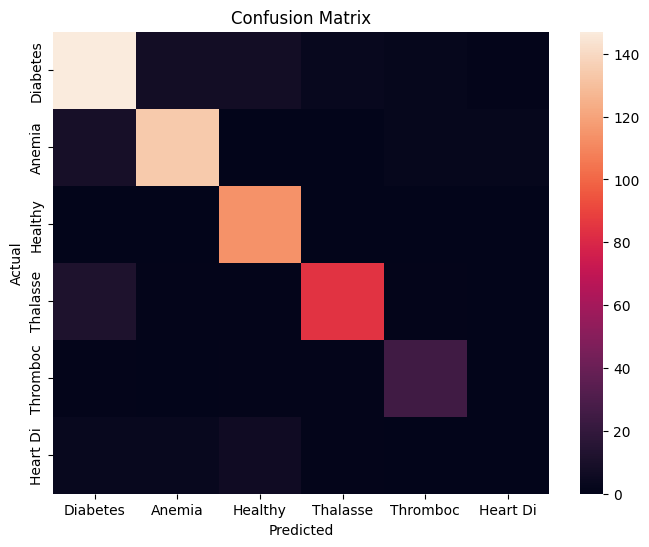

In [283]:
pred = lg.predict(X_test)
cm = confusion_matrix(y_test, pred)
cmdf = pd.DataFrame(cm, index=["Diabetes","Anemia","Healthy","Thalasse","Thromboc","Heart Di"], columns=["Diabetes","Anemia","Healthy","Thalasse","Thromboc","Heart Di"])
plt.figure(figsize=(8,6))
sns.heatmap(cmdf)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [284]:
lg.score(X_train, y_train)

0.8924636403702071

here, we have our training accuracy for logistic regression model

DECISION TREE CLASSIFIER:

In [285]:
dtr= DecisionTreeClassifier()

we are using classifier model to increase our accuracy

In [286]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier()

In [287]:
y_pred = dtr.predict(X_test)

In [288]:
from sklearn.metrics import accuracy_score

In [289]:
accuracy_score(y_test,y_pred)

0.9577464788732394

RANDOM FOREST CLASSIFIER:

In [295]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)

we are using another classification model to see if we can increase our accuracy

In [296]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [297]:
y_pred = rfc.predict(X_test)

In [298]:
accuracy_score(y_test, y_pred)

0.9401408450704225